In [34]:
from data import Data
import mplfinance as fplt
from plotting import CandlePlot
from talib import ATR
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
data_path = '../data/'
instruments = "../data/instruments.json"

In [3]:
ticker = 'EUR_USD'
freq = 'M5'
sim_no = 1

In [4]:
df = pd.read_pickle(data_path + f'{ticker}_{freq}.pkl')

In [84]:
plot_df = df[:1000].copy()

In [6]:
plot_df['ha_o'] = (plot_df.mid_o.shift(1) + plot_df.mid_c.shift(1)) / 2
# plot_df['ha_h'] = max(plot_df.mid_o + plot_df.mid_h + plot_df.mid_c)                         
# plot_df['ha_l'] = min(plot_df.mid_o + plot_df.mid_l + plot_df.mid_c)
plot_df['ha_h'] = plot_df.mid_h
plot_df['ha_l'] = plot_df.mid_l
plot_df['ha_c'] = (plot_df.mid_o + plot_df.mid_h + plot_df.mid_l + plot_df.mid_c) / 4

In [7]:
cp = CandlePlot(plot_df, candles=True)
cp.show_plot()
cp = CandlePlot(plot_df, heiken_ashi=True)
cp.show_plot()

In [145]:
plot_df = df.iloc[20000:25000].copy()

In [146]:
plot_df['ATR'] = ATR(plot_df.mid_h, plot_df.mid_l, plot_df.mid_c, timeperiod=14)

In [147]:
pdf = plot_df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'ATR']].copy()
pdf.set_index('time', inplace=True)
pdf.dropna(inplace=True)
pdf = pdf[['mid_o', 'mid_h', 'mid_l', 'mid_c', 'ATR']].set_axis(['Open', 'High', 'Low', 'Close', 'ATR'], axis=1)
pdf

,Open,High,Low,Close,ATR
time,,,,,
2016-03-21 03:15:00+00:00,1.12792,1.12794,1.12774,1.12784,0.000176
2016-03-21 03:20:00+00:00,1.12782,1.12782,1.12758,1.12761,0.000182
2016-03-21 03:25:00+00:00,1.12757,1.12760,1.12736,1.12738,0.000187
2016-03-21 03:30:00+00:00,1.12740,1.12744,1.12724,1.12728,0.000188
2016-03-21 03:35:00+00:00,1.12732,1.12745,1.12728,1.12734,0.000187
...,...,...,...,...,...
2016-04-13 11:50:00+00:00,1.12996,1.13047,1.12973,1.13010,0.000563
2016-04-13 11:55:00+00:00,1.13012,1.13044,1.13012,1.13030,0.000547
2016-04-13 12:00:00+00:00,1.13028,1.13046,1.12981,1.13042,0.000555


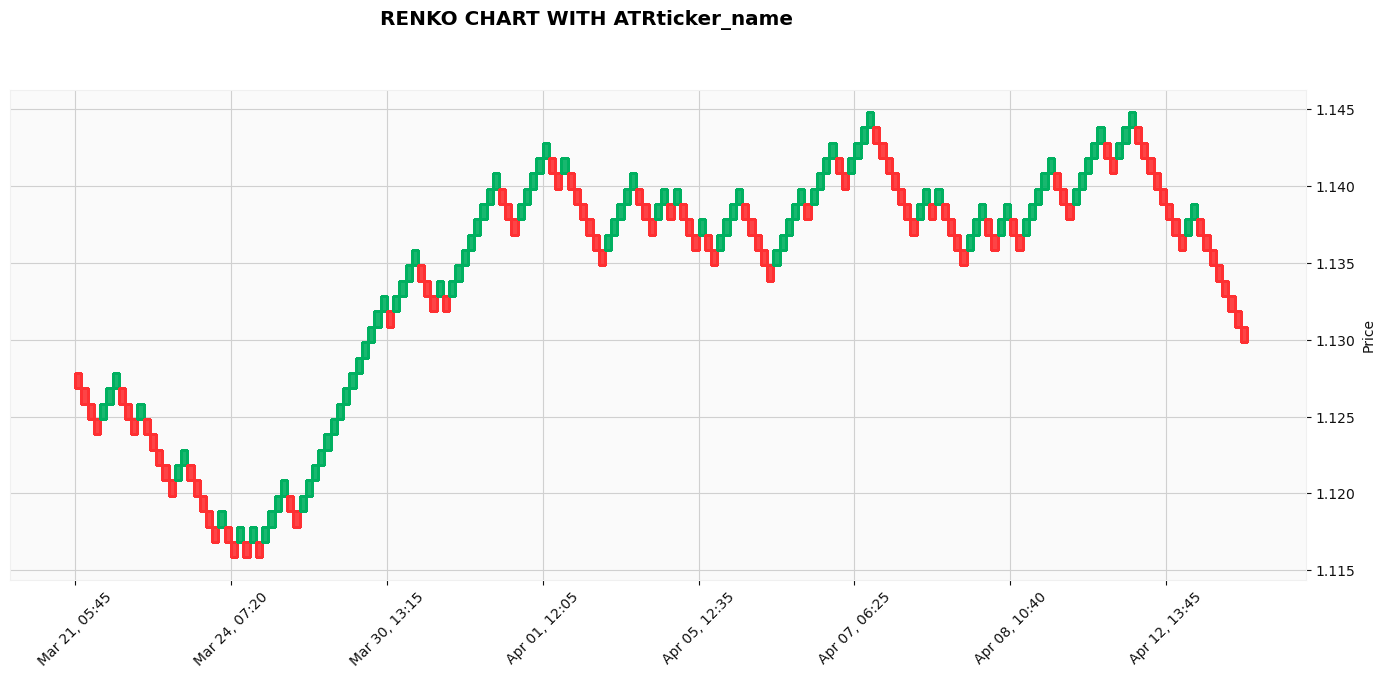

In [148]:
fplt.plot(pdf,type='renko',renko_params=dict(brick_size=0.0010),
          style='yahoo',figsize =(18,7),
          title = "RENKO CHART WITH ATR{0}".format('ticker_name'))

In [149]:
print(pdf.iloc[:100].index)

DatetimeIndex(['2016-03-21 03:15:00+00:00', '2016-03-21 03:20:00+00:00',
               '2016-03-21 03:25:00+00:00', '2016-03-21 03:30:00+00:00',
               '2016-03-21 03:35:00+00:00', '2016-03-21 03:40:00+00:00',
               '2016-03-21 03:45:00+00:00', '2016-03-21 03:50:00+00:00',
               '2016-03-21 03:55:00+00:00', '2016-03-21 04:00:00+00:00',
               '2016-03-21 04:05:00+00:00', '2016-03-21 04:10:00+00:00',
               '2016-03-21 04:15:00+00:00', '2016-03-21 04:20:00+00:00',
               '2016-03-21 04:25:00+00:00', '2016-03-21 04:30:00+00:00',
               '2016-03-21 04:35:00+00:00', '2016-03-21 04:40:00+00:00',
               '2016-03-21 04:45:00+00:00', '2016-03-21 04:50:00+00:00',
               '2016-03-21 04:55:00+00:00', '2016-03-21 05:00:00+00:00',
               '2016-03-21 05:05:00+00:00', '2016-03-21 05:10:00+00:00',
               '2016-03-21 05:15:00+00:00', '2016-03-21 05:20:00+00:00',
               '2016-03-21 05:25:00+00:00', '2016-0